# Project: Investigate a Dataset - No Show Appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset I am investigating for analysis is the medical appointment data based in Brazil that identifies whether or not a patient shows up for their appointment. Column Names include:

    PatientId: Unique identifier for a specific patient.
    AppointmentID: Unique identifier for a specific appointment.
    Gender: Gender of patient.
    ScheduledDay: Day patient scheduled appointment.
    AppointmentDay: Day of the appointment.
    Age: Age of patient.
    Neighbourhood: Location of hospital.
    Scholarship: Indicates whether patient uses Brasilian welfare program Bolsa Família.
    Hipertension: Indicates whether patient has hypertension.
    Diabetes: Indicates whter patient has diabetes.
    Alcoholism: Indicates whether patient has alcoholism.
    Handcap: Indicates whether patient has a handicap.
    SMS_received: Indicates whether patient recieved a text reminder for appointment.
    No-show: Indicates whether patient was a no show or not. 'Yes' indicates they did not show up, 'No' indicates they did show up. 

### Question(s) for Analysis

This analysis will focus on the questions: 
**Are there specific medical conditions or amount of medical conditions that predict whether a patient will show up to their appointment?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#Get number of rows and columns from data frame.
df.shape

(110527, 14)

In [5]:
#General information on cell values and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
#quick summary of numerical data for data frame
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
#Checking for duplicate rows
df.duplicated().sum()

0

#### General Properties Findings: 
    
* There are no null values or duplicate rows. 
* Drop Columns unrelated to analysis questions:
    * _AppointmentID_ 
    * _Gender_
    * _ScheduledDay_
    * _AppointmentDay_
    * _Age_
    * _Neighbourhood_
    * _Scholarship_
    * *SMS_received* 
* All columns need to be changed to lowercase for simplicity
* The dash in 'No-show' should be changed to an underscore. 
* Columns *Hipertension* and *Handcap* will have the spelling fixed. 
* *Handcap* has values greater than 1 which need to be changed back to 1 as it is a True/False indicator (per Kaggle).
* Add a column named _conditions_ that will be a sum of _Hipertension_, _Diabetes_, _Alcoholism_, and _Handcap_ per row for data analysis. 
* No_show needs to be changed to True/False using 1s and 0s for numerical analysis. 


### Data Cleaning

In [8]:
#Dropping unnecessary columns
df.drop(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age','Neighbourhood', 'Scholarship', 'SMS_received'], axis = 1, inplace=True)
df.head()

,Hipertension,Diabetes,Alcoholism,Handcap,No-show
0,1,0,0,0,No
1,0,0,0,0,No
2,0,0,0,0,No
3,0,0,0,0,No
4,1,1,0,0,No


In [9]:
#Reformat cells to lowercase and underscores for cleanliness
df.rename(columns = lambda x: x.strip().lower().replace("-","_"),inplace=True)
df.head()

,hipertension,diabetes,alcoholism,handcap,no_show
0,1,0,0,0,No
1,0,0,0,0,No
2,0,0,0,0,No
3,0,0,0,0,No
4,1,1,0,0,No


In [10]:
#change spelling for hipertension and handcap
df.rename(columns = {'hipertension': 'hypertension', 'handcap': 'handicap'}, inplace=True)
df.head()

,hypertension,diabetes,alcoholism,handicap,no_show
0,1,0,0,0,No
1,0,0,0,0,No
2,0,0,0,0,No
3,0,0,0,0,No
4,1,1,0,0,No


In [11]:
#change no_show data to True/False
df['no_show'].replace({'Yes': 1, 'No': 0}, inplace = True)
df.head()

,hypertension,diabetes,alcoholism,handicap,no_show
0,1,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,1,1,0,0,0


In [12]:
#Change handicap values greater than 1 back to 1:
df['handicap'].replace([2, 3, 4], 1,inplace=True)
df.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

In [13]:
#Add a conditions column that will be a sum of 'Trues' in medical conditions columsn.
df['conditions'] = df.hypertension + df.diabetes + df.alcoholism + df.handicap
df.head()

,hypertension,diabetes,alcoholism,handicap,no_show,conditions
0,1,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,1,1,0,0,0,2


<a id='eda'></a>
## Exploratory Data Analysis
#### General Properties post-cleaning
I wanted to take the opportunity to rerun some summary statistics after cleaning in order to have a better idea of what to look for when running my analysis. 

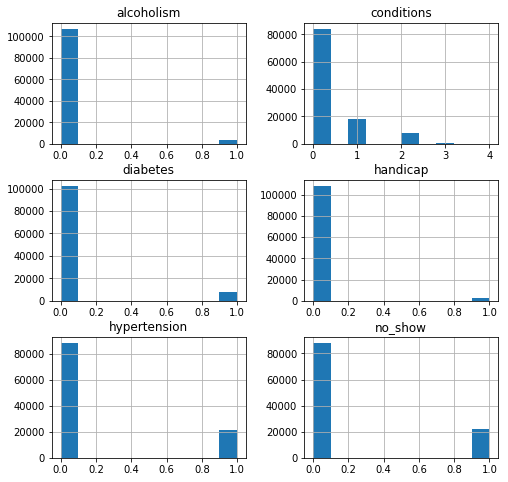

In [14]:
#Display histograms of remaining columns
df.hist(figsize=(8,8));

At first glance there is clearly more instances of Hypertension than other conditions however the histograms aren't clear on counts, especially when looking at the number of people with 4 conditions. There is clearly a value or else the 4 wouldn't appear on the x-axis, but the value is too small in relation to the rest of the data. I will need to get the value counts and I will work with percents instead of overall counts for legibility. 

In [15]:
#create percent function
def percent(data):
        percent = ((data.value_counts() / data.count()) * 100).round(decimals=2)
        return percent

In [16]:
#Hypertension value counts
df.hypertension.value_counts()

0    88726
1    21801
Name: hypertension, dtype: int64

In [17]:
#Percent of data with or without Hypertension
percent(df.hypertension)

0    80.28
1    19.72
Name: hypertension, dtype: float64

In [18]:
#Diabetes value counts
df.diabetes.value_counts()

0    102584
1      7943
Name: diabetes, dtype: int64

In [19]:
#Percent of data with or without Diabetes
percent(df.diabetes)

0    92.81
1     7.19
Name: diabetes, dtype: float64

In [20]:
#Alcoholism value counts
df.alcoholism.value_counts()

0    107167
1      3360
Name: alcoholism, dtype: int64

In [21]:
#Percent of data with or without Alcoholism
percent(df.alcoholism)

0    96.96
1     3.04
Name: alcoholism, dtype: float64

In [22]:
#Handicap value counts
df.handicap.value_counts()

0    108286
1      2241
Name: handicap, dtype: int64

In [23]:
#Percent of data with or without a handicap
percent(df.handicap)

0    97.97
1     2.03
Name: handicap, dtype: float64

In [24]:
#Conditions value counts
df.conditions.value_counts()

0    84115
1    18123
2     7658
3      618
4       13
Name: conditions, dtype: int64

In [25]:
#Percent of data with a specific number of Conditions
percent(df.conditions)

0    76.10
1    16.40
2     6.93
3     0.56
4     0.01
Name: conditions, dtype: float64

In [26]:
#No Show value counts
df.no_show.value_counts()

0    88208
1    22319
Name: no_show, dtype: int64

In [27]:
#Percent of data that did or did not show up to their appointment
percent(df.no_show)

0    79.81
1    20.19
Name: no_show, dtype: float64

### Are there specific medical conditions or amount of medical conditions that predict whether a patient will show up to their appointment?

For this analysis I will be analyzing the percents of people who did and did not attend their appointment and cross-reference the data with whether the patient had a specific condition or a number of conditions to check for any correlation in the data.   

In [28]:
#Create masks to separate patients who did or did not attend appointment for question analysis.
no_show= df.no_show == True
arrived= df.no_show == False

#### Hypertension Analysis

In [29]:
#Percent of patients with or without hypertension that did not attend appointment.
hyp_n = percent(df.hypertension[no_show])

#Percent of patients with or without hypertension that did attend appointment.
hyp_a = percent(df.hypertension[arrived])

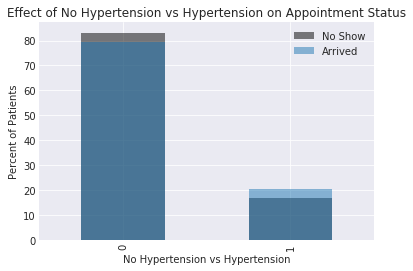

Percents of Patients with Missed Appointments with or without Hypertension:
 0    83.1
1    16.9
Name: hypertension, dtype: float64 

Percents of Patients with Made Appointments with or without Hypertension:
 0    79.56
1    20.44
Name: hypertension, dtype: float64


In [45]:
hyp_n.plot(kind='bar', alpha = 0.5, color = 'black' , label = 'No Show')
hyp_a.plot(kind='bar', alpha = 0.5, label = 'Arrived');
plt.legend()
plt.grid(True)
plt.ylabel('Percent of Patients')
plt.xlabel('No Hypertension vs Hypertension')
plt.title('Effect of No Hypertension vs Hypertension on Appointment Status')
sns.set_style('dark'); 
plt.show()
print('Percents of Patients with Missed Appointments with or without Hypertension:\n',hyp_n,'\n\nPercents of Patients with Made Appointments with or without Hypertension:\n', hyp_a);

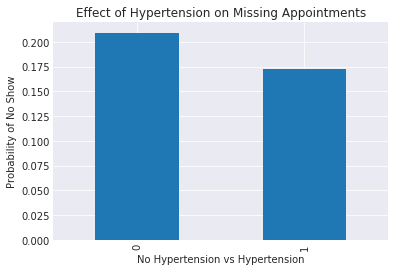

hypertension
0    0.209
1    0.173
Name: no_show, dtype: float64


In [46]:
df.groupby('hypertension').no_show.mean().plot(kind='bar');
plt.xlabel('No Hypertension vs Hypertension');
plt.ylabel('Probability of No Show');
plt.grid(True)
plt.title('Effect of Hypertension on Missing Appointments');
plt.show()
print(df.groupby('hypertension').no_show.mean().round(decimals = 3))

#### Hypertension Analysis  Findings

Based on the analysis, it appears that patients without hypertension were less likely to attend their appointment than those that did not have hypertension. In the first graph, _Effect of No Hypertension vs Hypertension on Appointment Status_, over 80% of patients who did not show up to their appointment did not have hypertension; while less than 20% of patients who did not attend did have hypertension. For the second graph (_Effect of Hypertension on Missing Appointments_) appears that patients without hypertension were had a higher probability of missing their appointment than those with hypertension. 

#### Diabetes Analysis

In [32]:
#Percent of patients with or without diabetes that did not attend appointment.
dia_n = percent(df.diabetes[no_show])

#Percent of patients with or without diabetes that did attend appointment.
dia_a = percent(df.diabetes[arrived])

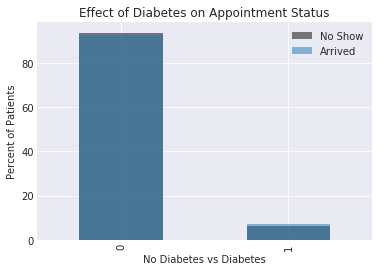

Percents of Patients with Missed Appointments with or without Diabetes:
 0    93.59
1     6.41
Name: diabetes, dtype: float64 

Percents of Patients with Made Appointments with or without Diabetes:
 0    92.62
1     7.38
Name: diabetes, dtype: float64


In [33]:
dia_n.plot(kind='bar', alpha = 0.5, color = 'black' , label = 'No Show')
dia_a.plot(kind='bar', alpha = 0.5, label = 'Arrived');
plt.legend()
plt.grid(True)
plt.ylabel('Percent of Patients')
plt.xlabel('No Diabetes vs Diabetes')
plt.title('Effect of Diabetes on Appointment Status')
sns.set_style('dark'); 
plt.show()
print('Percents of Patients with Missed Appointments with or without Diabetes:\n',dia_n,'\n\nPercents of Patients with Made Appointments with or without Diabetes:\n', dia_a);

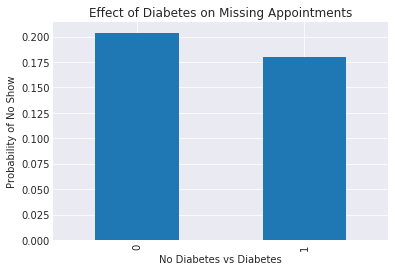

diabetes
0    0.204
1    0.180
Name: no_show, dtype: float64


In [34]:
df.groupby('diabetes').no_show.mean().plot(kind='bar');
plt.xlabel('No Diabetes vs Diabetes');
plt.ylabel('Probability of No Show');
plt.grid(True)
plt.title('Effect of Diabetes on Missing Appointments');
plt.show()
print(df.groupby('diabetes').no_show.mean().round(decimals = 3))

#### Diabetes Analysis  Findings

At first glance, the first graph (_Effect of Diabetes on Appointment Status_) makes it seem that having diabetes or not had minimal impact(around 1% difference) on whether a patient missed their appointment or not. However, when looking deeper at the patients who missed their appointment (_Effect of Diabetes on Missing Appointments_) it does appear that those without diabetes were more likely to miss their appointment than those that did have diabetes.

#### Alcholism Analysis

In [35]:
#Percent of patients with or without alcoholism that did not attend appointment.
alc_n = percent(df.alcoholism[no_show])

#Percent of patients with or without alcoholism that did attend appointment.
alc_a = percent(df.alcoholism[arrived])

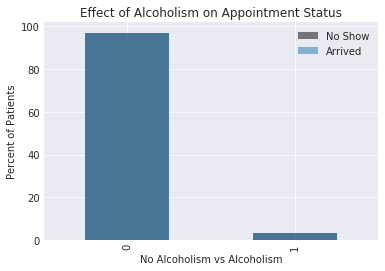

Percents of Patients with Missed Appointments with or without Alcholism:
 0    96.97
1     3.03
Name: alcoholism, dtype: float64 

Percents of Patients with Made Appointments with or without Alcoholism:
 0    96.96
1     3.04
Name: alcoholism, dtype: float64


In [36]:
alc_n.plot(kind='bar', alpha = 0.5, color = 'black' , label = 'No Show')
alc_a.plot(kind='bar', alpha = 0.5, label = 'Arrived')
plt.legend()
plt.grid(True)
plt.ylabel('Percent of Patients')
plt.xlabel('No Alcoholism vs Alcoholism')
plt.title('Effect of Alcoholism on Appointment Status')
sns.set_style('dark')
plt.show()
print('Percents of Patients with Missed Appointments with or without Alcholism:\n',alc_n,'\n\nPercents of Patients with Made Appointments with or without Alcoholism:\n', alc_a); 

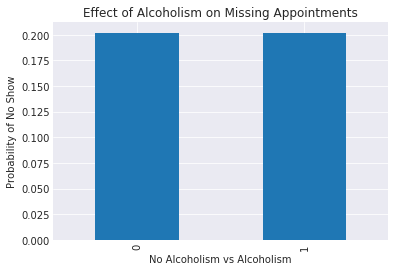

alcoholism
0    0.202
1    0.201
Name: no_show, dtype: float64


In [37]:
df.groupby('alcoholism').no_show.mean().plot(kind='bar');
plt.xlabel('No Alcoholism vs Alcoholism');
plt.ylabel('Probability of No Show');
plt.grid(True)
plt.title('Effect of Alcoholism on Missing Appointments');
plt.show()
print(df.groupby('alcoholism').no_show.mean().round(decimals = 3))

#### Alcoholism Analysis  Findings

The percents of patients with or without alcoholism and missed their appointment were .01% different than those patients that did make their appointment. Also there is minimal difference (.001) in probability of a patient missing their appointment based on whether the patient had alcoholism or not. After analysis it does not appear that a patient having alcoholism or not was an indicator for whether a patient attended their appointment or not.

#### Handicap Analysis

In [38]:
#Percent of patients with or without a handicap that did not attend appointment.
han_n = percent(df.handicap[no_show])

#Percent of patients with or without a handicap that did attend appointment.
han_a = percent(df.handicap[arrived])

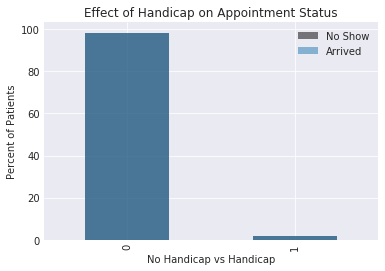

Percents of Patients with Missed Appointments with or without a Handicap:
 0    98.18
1     1.82
Name: handicap, dtype: float64 

Percents of Patients with Made Appointments with or without a Handicap:
 0    97.92
1     2.08
Name: handicap, dtype: float64


In [39]:
han_n.plot(kind='bar', alpha = 0.5, color = 'black' , label = 'No Show')
han_a.plot(kind='bar', alpha = 0.5, label = 'Arrived');
plt.legend()
plt.grid(True)
plt.ylabel('Percent of Patients')
plt.xlabel('No Handicap vs Handicap')
plt.title('Effect of Handicap on Appointment Status')
sns.set_style('dark'); 
plt.show()
print('Percents of Patients with Missed Appointments with or without a Handicap:\n',han_n,'\n\nPercents of Patients with Made Appointments with or without a Handicap:\n', han_a);

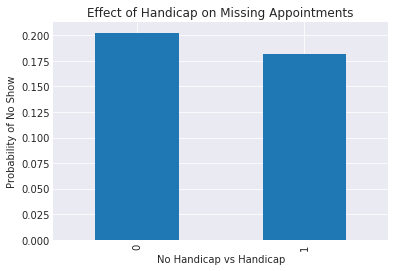

handicap
0    0.202
1    0.182
Name: no_show, dtype: float64


In [40]:
df.groupby('handicap').no_show.mean().plot(kind='bar');
plt.xlabel('No Handicap vs Handicap');
plt.ylabel('Probability of No Show');
plt.grid(True)
plt.title('Effect of Handicap on Missing Appointments');
plt.show()
print(df.groupby('handicap').no_show.mean().round(decimals = 3))

#### Handicap Analysis  Findings

At first glance, there does not seem to be a significant difference (<1%) between patients with or without a handicap missing their appointment or not. However, when looking deeper at the patients who missed their appointment (_Effect of Handicap on Missing Appointments_) it does appear that those without a handicap had a higher probability (.02) of missing their appointment than those without a handicap.

#### Combined Condition Analysis

In [41]:
#Percent of patients with or without conditions that did not attend appointment.
con_n = percent(df.conditions[no_show])

#Percent of patients with or without conditions that did attend appointment.
con_a = percent(df.conditions[arrived])

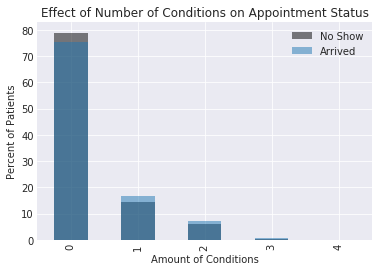

Percents of Patients with Missed Appointments with or without Conditions:
 0    78.87
1    14.56
2     6.13
3     0.43
4     0.02
Name: conditions, dtype: float64 

Percents of Patients with Made Appointments with or without Conditions:
 0    75.40
1    16.86
2     7.13
3     0.59
4     0.01
Name: conditions, dtype: float64


In [42]:
con_n.plot(kind='bar', alpha = 0.5, color = 'black' , label = 'No Show')
con_a.plot(kind='bar', alpha = 0.5, label = 'Arrived');
plt.legend()
plt.grid(True)
plt.ylabel('Percent of Patients')
plt.xlabel('Amount of Conditions')
plt.title('Effect of Number of Conditions on Appointment Status')
sns.set_style('dark')
plt.show()
print('Percents of Patients with Missed Appointments with or without Conditions:\n',con_n,'\n\nPercents of Patients with Made Appointments with or without Conditions:\n', con_a); 

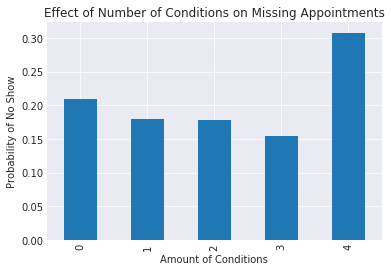

conditions
0    0.209
1    0.179
2    0.179
3    0.154
4    0.308
Name: no_show, dtype: float64


In [43]:
df.groupby('conditions').no_show.mean().plot(kind='bar');
plt.xlabel('Amount of Conditions');
plt.ylabel('Probability of No Show');
plt.grid(True)
plt.title('Effect of Number of Conditions on Missing Appointments')
plt.show()
print(df.groupby('conditions').no_show.mean().round(decimals = 3));

#### Combined Conditions Analysis  Findings

Based on the analysis, it appears that patients without any conditions were less likely to attend their appointment and as the number of conditions rose, the percent of patients missing their appointments decreased. When looking deeper at those patients that missed their appointments in the second graph, the data tended to follow that pattern; the probability of missing an appointment decreased as the number of conditions increased. However when a patient had a combination of all four conditions (hypertension, diabetes, alcoholism, and a handicap) the probability of them missing their appointment was the highest. That being said there were only 13 appointments made for patients that had all four conditions so the impact that each appointment had on the data is greater. 

<a id='conclusions'></a>
## Conclusions

After my analysis there does not seem to be a correlation between patients having any one specific condition and missing their appointment. There does seem to be a correlation that having all four types of conditions makes a patient less likely to make their appointment but there is not enough data to have a definitive answer. If anything, there seems to be a correlation between patients without conditions and the likeliness to miss their appointment.

### Limitations

* Not enough patients with all four conditions to give reliable correlation between amount of conditions and likeliness of missing appointment
* Handicap is a broad term. If the handicap data could be broken up into different conditions then that might give a clearer picture on whether a condition or amount of conditions correlate with patients missing appointments.
* Analysis did not investigate the possibility of the combination of age and conditions or gender and conditions correlating with patients missing appointments.  

## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> **_Your question_**

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0